In [3]:
import numpy as np
import pandas as pd
import tensorflow
import tensorflow.keras
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.datasets import mnist
from keras import Sequential

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_test[0].shape

(28, 28)

In [6]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

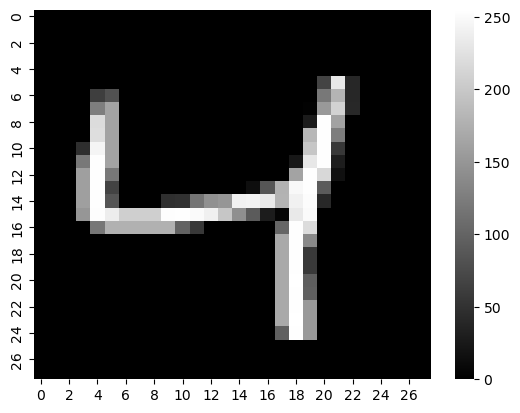

In [7]:
sns.heatmap(X_train[2], cmap='gray')

# LeNET Model

In [8]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5),padding='valid', activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=16, kernel_size=(5,5),padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))

model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2709 - accuracy: 0.9192 - val_loss: 0.1206 - val_accuracy: 0.9643
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0998 - accuracy: 0.9702 - val_loss: 0.0901 - val_accuracy: 0.9724
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0692 - accuracy: 0.9786 - val_loss: 0.0665 - val_accuracy: 0.9799
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0627 - val_accuracy: 0.9818
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0622 - val_accuracy: 0.9819
Epoch 6/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0348 - accuracy: 0.9883 - val_loss: 0.0626 - val_accuracy: 0.9811
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0587 - val_ac

In [12]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
pred = pred.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(pred, y_test)

0.9848

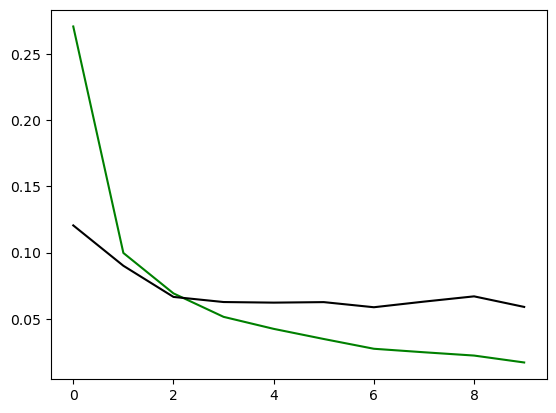

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='black')